In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
!pip install mplfinance

#Import liblaries

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf
import statsmodels.api as sm
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import zscore
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset

In [34]:
%cd /content/drive/MyDrive/My_Files/Stock_Price_Prediction
file_path = "question4-stock-data.csv"
df = pd.read_csv(file_path)

/content/drive/MyDrive/My_Files/Stock_Price_Prediction


In [35]:
df.describe()

,Unnamed: 0,Adj Close,Close,High,Low,Open,Volume
count,11291.000000,11198.000000,11174.000000,11196.000000,11164.000000,11188.000000,1.114600e+04
mean,5645.000000,63.609130,72.026945,72.503100,71.665079,67.999259,2.144157e+05
std,3259.575279,52.266247,51.259828,51.550735,51.011632,55.834401,3.883662e+05
min,0.000000,2.259452,3.237711,3.237711,3.237711,0.000000,0.000000e+00
25%,2822.500000,19.224636,27.500000,27.789255,27.536156,0.000000,1.350000e+04
50%,5645.000000,50.608900,66.035000,66.724998,65.418751,66.065002,9.032350e+04
75%,8467.500000,104.723621,114.297503,114.892500,113.639999,114.269997,2.915750e+05
max,11290.000000,254.770004,254.770004,255.229996,253.589996,255.000000,1.858270e+07


# **Data Cleaning & Preparation**

In [36]:
# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [37]:
# Drop rows where 'Close' and 'Date' are missing
df.dropna(subset=['Close', 'Date'], inplace=True)

In [38]:
# Check for missing values and empty strings together
missing_values_all_columns = df.isnull().sum()
print(missing_values_all_columns)


Unnamed: 0      0
Date            0
Adj Close      93
Close           0
High           92
Low           126
Open          100
Volume        141
dtype: int64


In [39]:
# Sort DataFrame by Date
df = df.sort_values(by='Date')

# Set 'Date' as the index for time-series analysis
df.set_index('Date', inplace=True)

# **Line Chart: Closing Price Over Time**

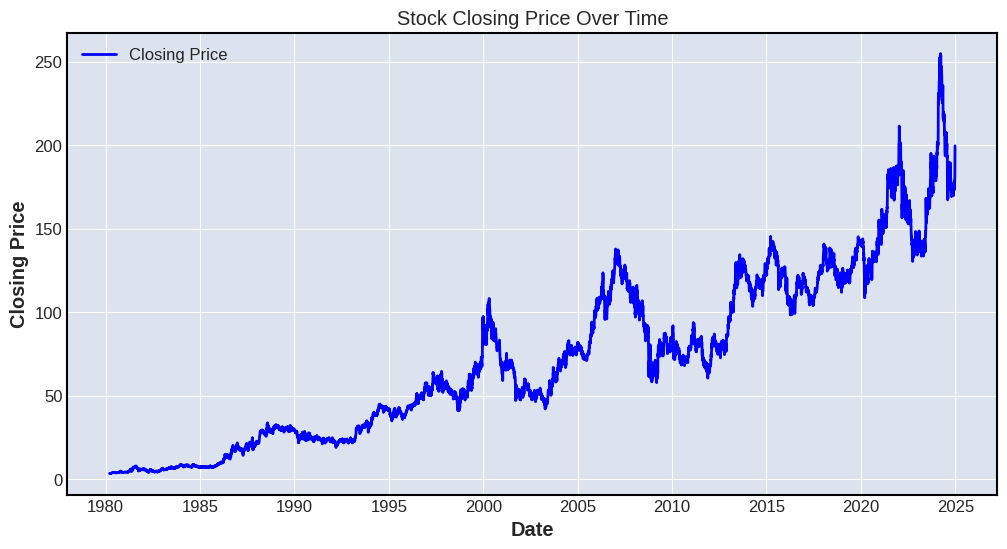

In [40]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Closing Price', color='blue')
plt.title("Stock Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.grid(True)
plt.show()

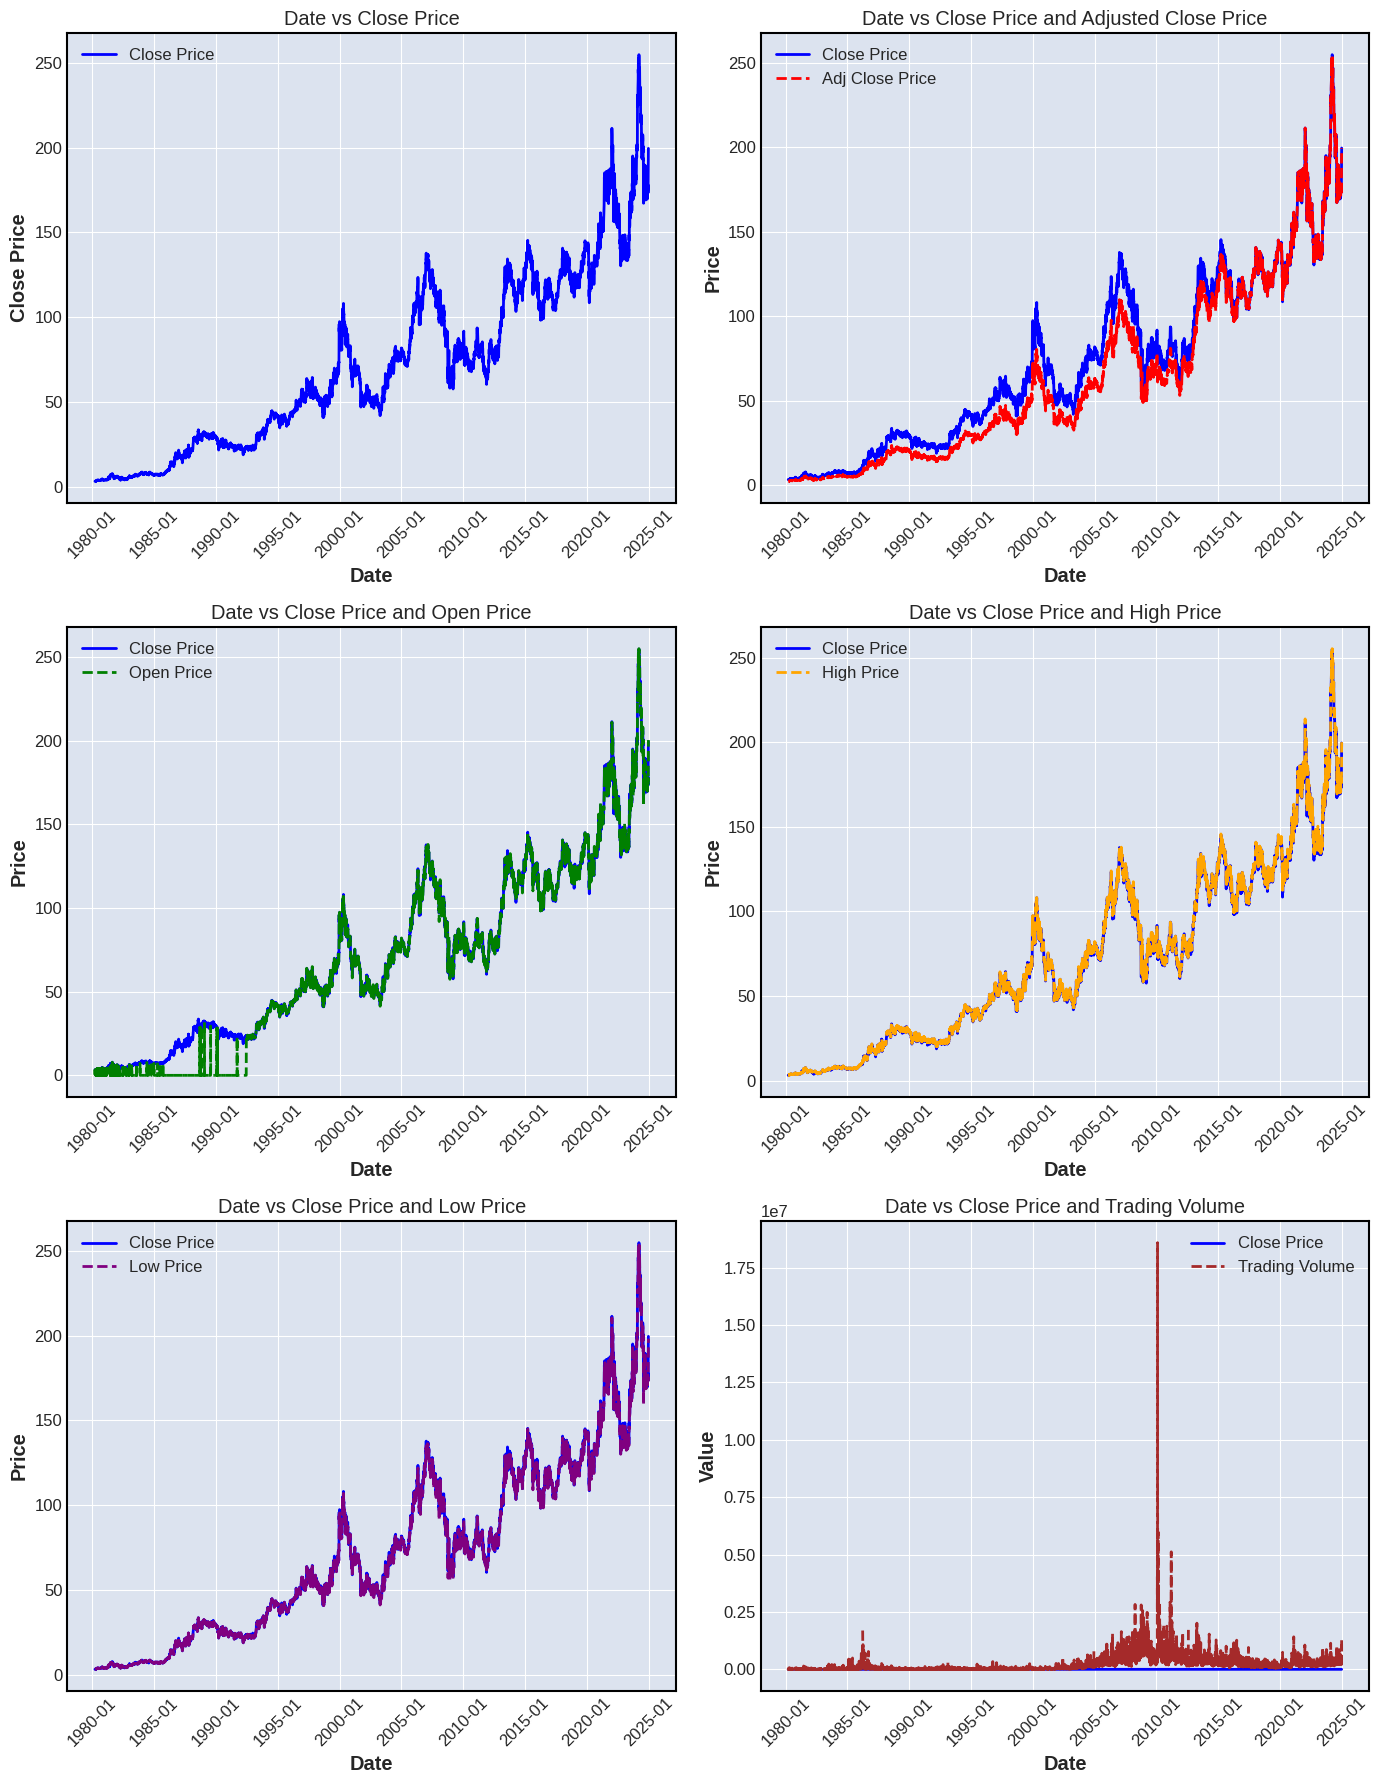

In [41]:
import matplotlib.dates as mdates

# Set figure size
plt.figure(figsize=(14, 18))

# Define date formatter for x-axis
date_format = mdates.DateFormatter("%Y-%m")

# Subplot 1: Date vs Close Price
plt.subplot(3, 2, 1)
plt.plot(df.index, df['Close'], label="Close Price", color='blue')
plt.title("Date vs Close Price")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Subplot 2: Date vs Close Price and Adj Close Price
plt.subplot(3, 2, 2)
plt.plot(df.index, df['Close'], label="Close Price", color='blue')
plt.plot(df.index, df['Adj Close'], label="Adj Close Price", color='red', linestyle="dashed")
plt.title("Date vs Close Price and Adjusted Close Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Subplot 3: Date vs Close Price and Open Price
plt.subplot(3, 2, 3)
plt.plot(df.index, df['Close'], label="Close Price", color='blue')
plt.plot(df.index, df['Open'], label="Open Price", color='green', linestyle="dashed")
plt.title("Date vs Close Price and Open Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Subplot 4: Date vs Close Price and High Price
plt.subplot(3, 2, 4)
plt.plot(df.index, df['Close'], label="Close Price", color='blue')
plt.plot(df.index, df['High'], label="High Price", color='orange', linestyle="dashed")
plt.title("Date vs Close Price and High Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Subplot 5: Date vs Close Price and Low Price
plt.subplot(3, 2, 5)
plt.plot(df.index, df['Close'], label="Close Price", color='blue')
plt.plot(df.index, df['Low'], label="Low Price", color='purple', linestyle="dashed")
plt.title("Date vs Close Price and Low Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Subplot 6: Date vs Close Price and Volume
plt.subplot(3, 2, 6)
plt.plot(df.index, df['Close'], label="Close Price", color='blue')
plt.plot(df.index, df['Volume'], label="Trading Volume", color='brown', linestyle="dashed")
plt.title("Date vs Close Price and Trading Volume")
plt.xlabel("Date")
plt.ylabel("Value")
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Adjust layout and show plots
plt.tight_layout()
plt.show()


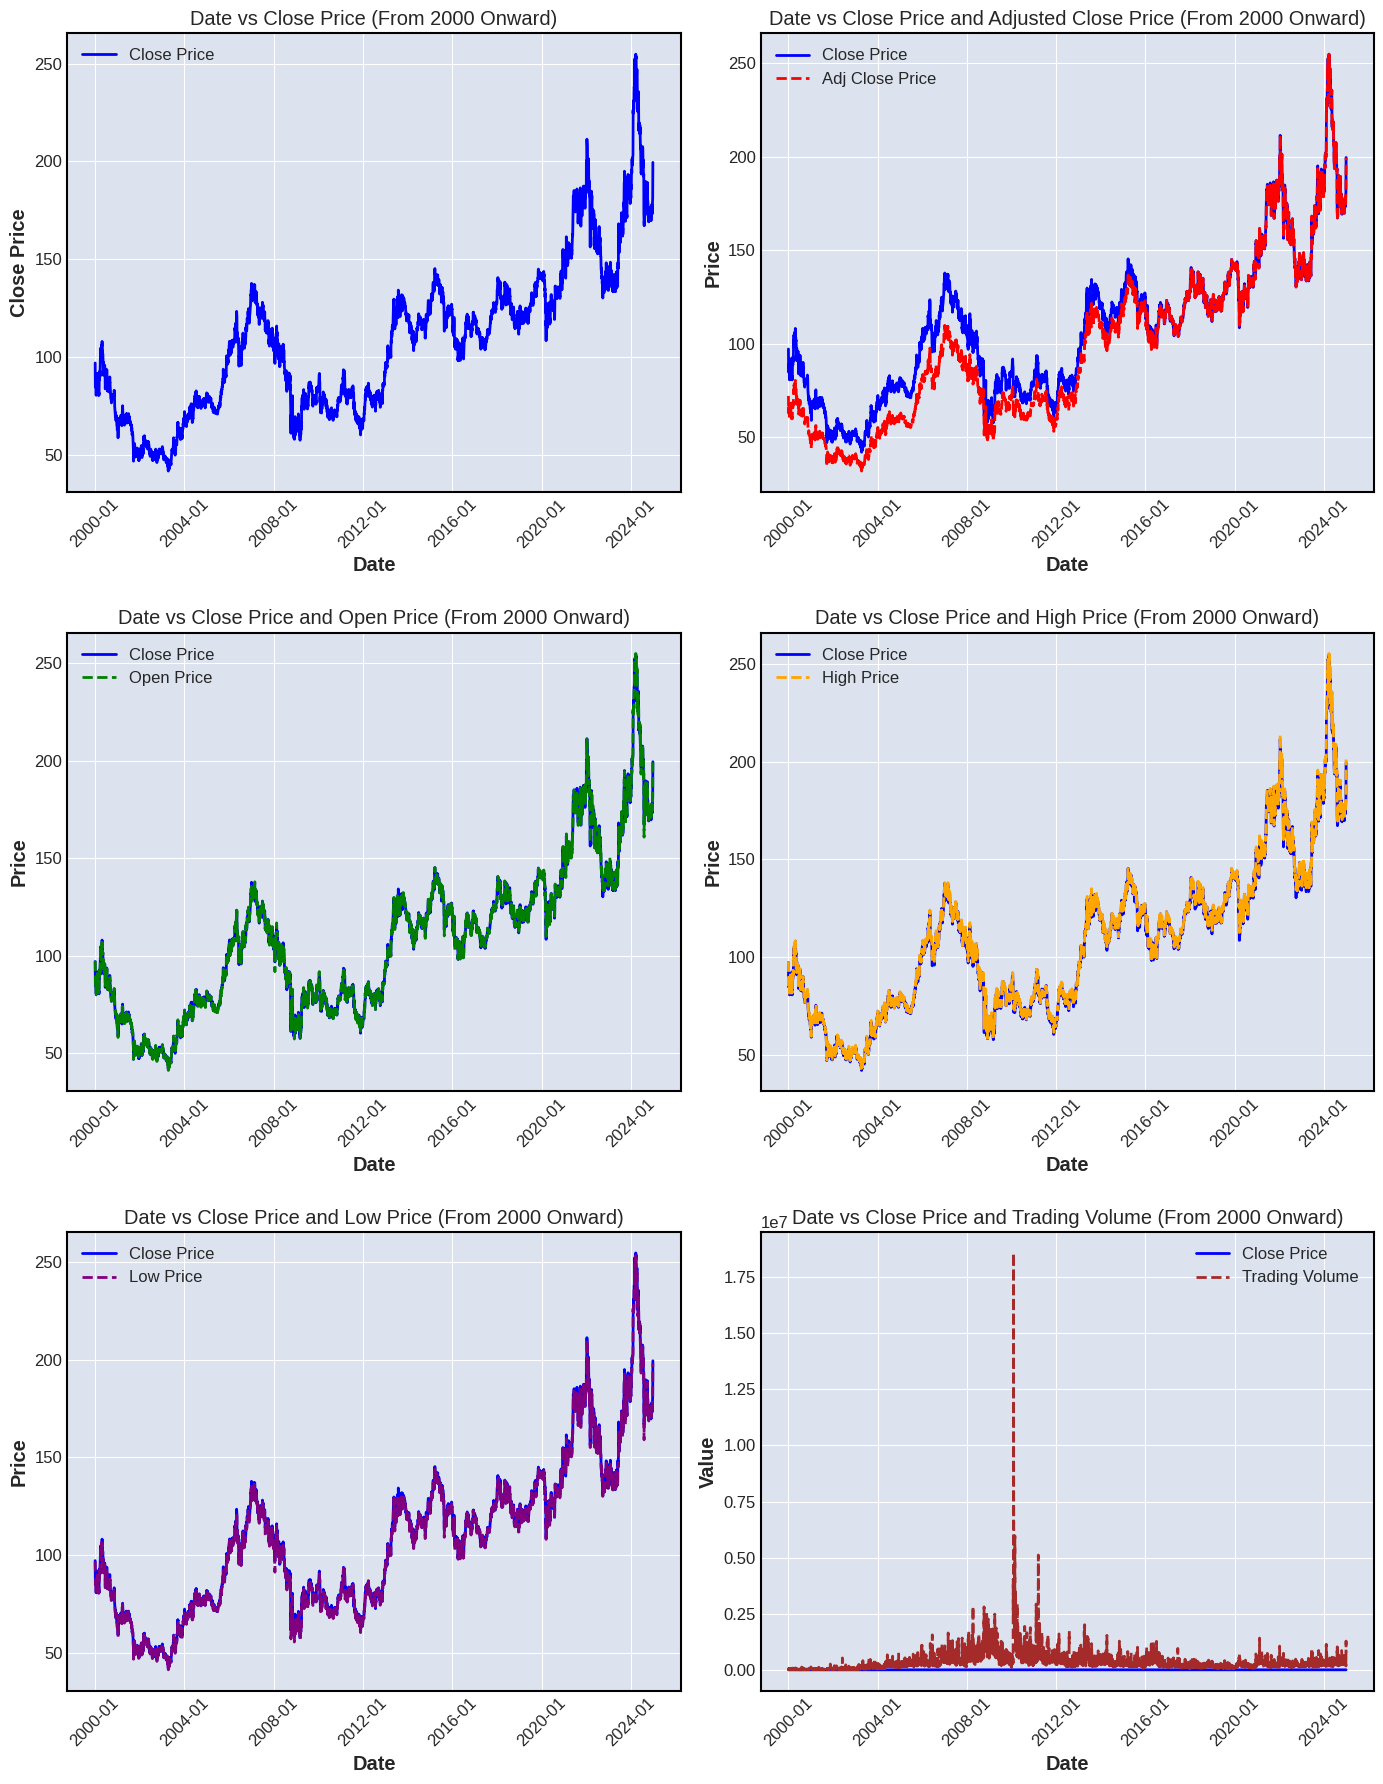

In [42]:
df_sorted = df.sort_index()  # Sort by index (assuming Date is the index)

# Ensure the 'Date' column is in datetime format
df_sorted['Date'] = pd.to_datetime(df_sorted.index, errors='coerce')

# Filter data to include only dates from 2000 onward
df_2000_onward = df_sorted[df_sorted.index >= pd.Timestamp("2000-01-01")]

# Set figure size
plt.figure(figsize=(14, 18))

# Define date formatter for x-axis
date_format = mdates.DateFormatter("%Y-%m")

# Subplot 1: Date vs Close Price
plt.subplot(3, 2, 1)
plt.plot(df_2000_onward.index, df_2000_onward['Close'], label="Close Price", color='blue')
plt.title("Date vs Close Price (From 2000 Onward)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Subplot 2: Date vs Close Price and Adj Close Price
plt.subplot(3, 2, 2)
plt.plot(df_2000_onward.index, df_2000_onward['Close'], label="Close Price", color='blue')
plt.plot(df_2000_onward.index, df_2000_onward['Adj Close'], label="Adj Close Price", color='red', linestyle="dashed")
plt.title("Date vs Close Price and Adjusted Close Price (From 2000 Onward)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Subplot 3: Date vs Close Price and Open Price
plt.subplot(3, 2, 3)
plt.plot(df_2000_onward.index, df_2000_onward['Close'], label="Close Price", color='blue')
plt.plot(df_2000_onward.index, df_2000_onward['Open'], label="Open Price", color='green', linestyle="dashed")
plt.title("Date vs Close Price and Open Price (From 2000 Onward)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Subplot 4: Date vs Close Price and High Price
plt.subplot(3, 2, 4)
plt.plot(df_2000_onward.index, df_2000_onward['Close'], label="Close Price", color='blue')
plt.plot(df_2000_onward.index, df_2000_onward['High'], label="High Price", color='orange', linestyle="dashed")
plt.title("Date vs Close Price and High Price (From 2000 Onward)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Subplot 5: Date vs Close Price and Low Price
plt.subplot(3, 2, 5)
plt.plot(df_2000_onward.index, df_2000_onward['Close'], label="Close Price", color='blue')
plt.plot(df_2000_onward.index, df_2000_onward['Low'], label="Low Price", color='purple', linestyle="dashed")
plt.title("Date vs Close Price and Low Price (From 2000 Onward)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Subplot 6: Date vs Close Price and Volume
plt.subplot(3, 2, 6)
plt.plot(df_2000_onward.index, df_2000_onward['Close'], label="Close Price", color='blue')
plt.plot(df_2000_onward.index, df_2000_onward['Volume'], label="Trading Volume", color='brown', linestyle="dashed")
plt.title("Date vs Close Price and Trading Volume (From 2000 Onward)")
plt.xlabel("Date")
plt.ylabel("Value")
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Adjust layout and show plots
plt.tight_layout()
plt.show()


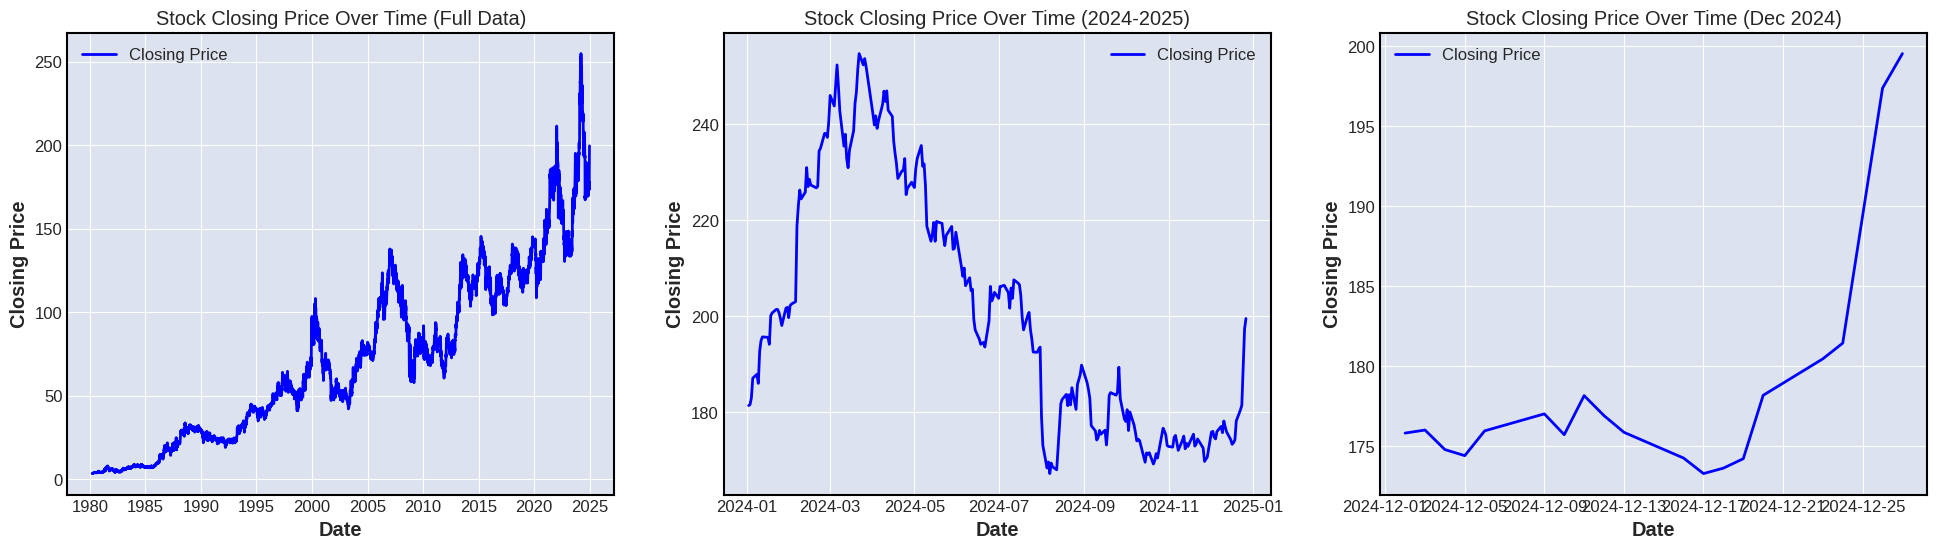

In [43]:
# Create side-by-side plots for full stock closing price, 2024-2025 filtered data, and Dec 2024
fig, axes = plt.subplots(1, 3, figsize=(24, 6))

# Full stock closing price chart
axes[0].plot(df.index, df['Close'], label='Closing Price', color='blue')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Closing Price')
axes[0].set_title('Stock Closing Price Over Time (Full Data)')
axes[0].legend()

# Filtered stock closing price chart (2024-2025)
df_filtered_24_25 = df.loc['2024-01-01':'2025-12-31']
axes[1].plot(df_filtered_24_25.index, df_filtered_24_25['Close'], label='Closing Price', color='blue')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Closing Price')
axes[1].set_title('Stock Closing Price Over Time (2024-2025)')
axes[1].legend()

# Filtered stock closing price chart (December 2024)
df_filtered_24_12 = df.loc['2024-12-01':'2024-12-31']
axes[2].plot(df_filtered_24_12.index, df_filtered_24_12['Close'], label='Closing Price', color='blue')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Closing Price')
axes[2].set_title('Stock Closing Price Over Time (Dec 2024)')
axes[2].legend()

# Show the side-by-side plots
plt.show()

# **Candlestick Chart (Last 30 Days)**

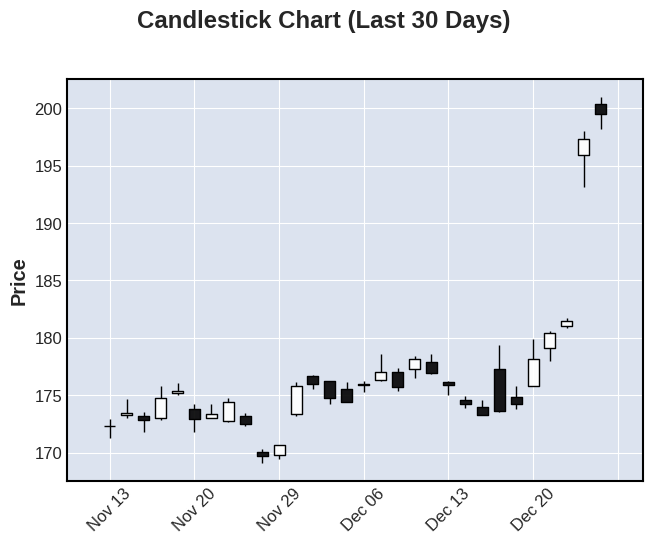

In [44]:

df_candle = df[['Open', 'High', 'Low', 'Close']].copy()
mpf.plot(df_candle[-30:], type='candle', volume=False, title="Candlestick Chart (Last 30 Days)")

# **Correlation Heatmap**

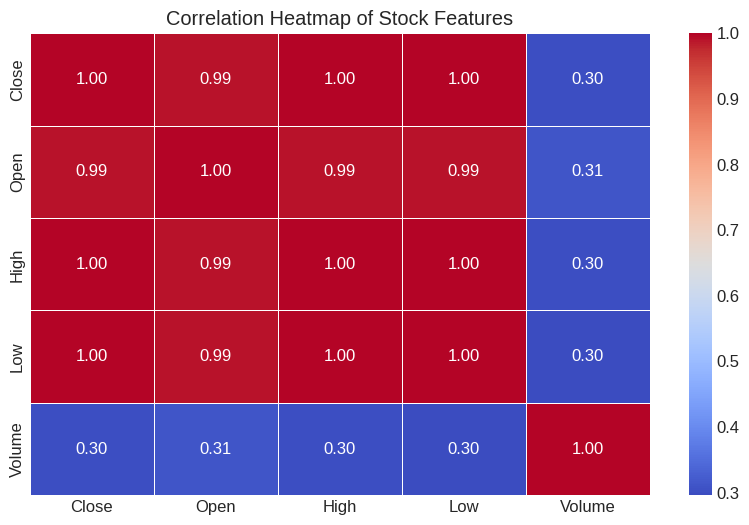

In [45]:

plt.figure(figsize=(10, 6))
corr_matrix = df[['Close', 'Open', 'High', 'Low', 'Volume']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Stock Features")
plt.show()

#**Moving Averages for Trend Analysis**

# **Boxplots for Outlier Detection**

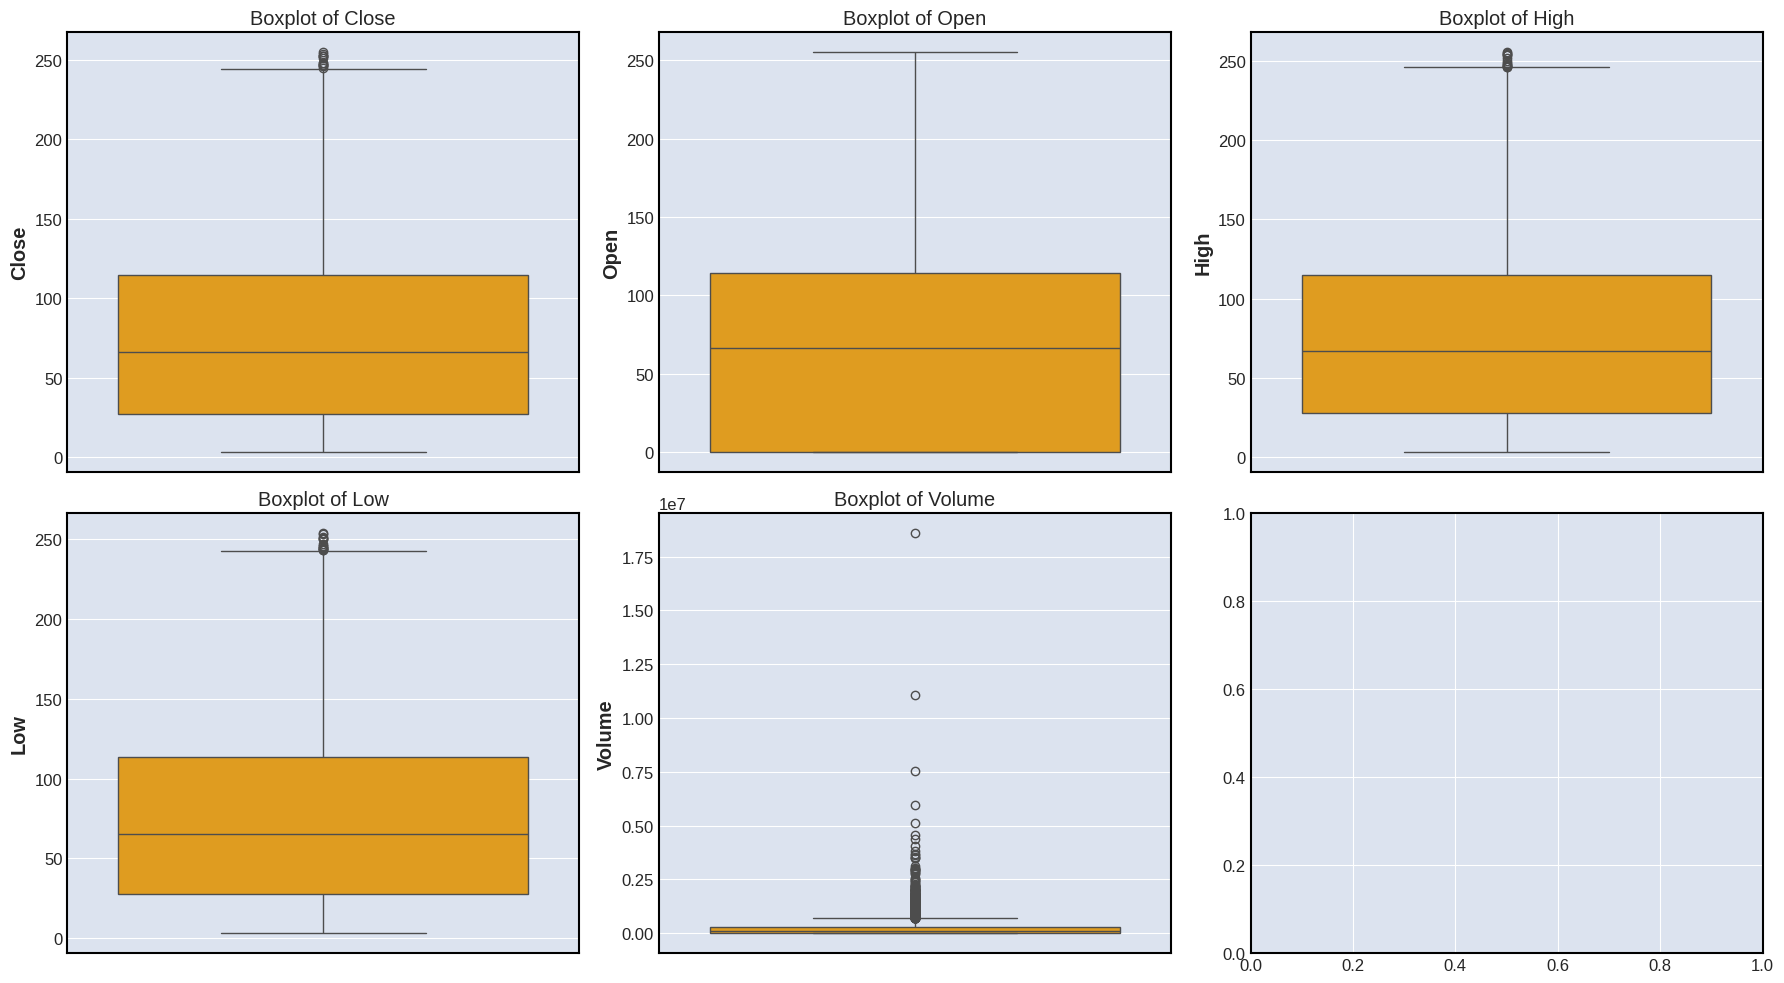

✅ Visualizations for key patterns and relationships are complete!


In [46]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
columns_to_check = ['Close', 'Open', 'High', 'Low', 'Volume']

for i, col in enumerate(columns_to_check):
    row, col_idx = divmod(i, 3)
    sns.boxplot(y=df[col], ax=axes[row, col_idx], color="orange")
    axes[row, col_idx].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

print("✅ Visualizations for key patterns and relationships are complete!")


#Analysis of trends, seasonality, and anomalies.

# **Trend Analysis with Moving Averages**

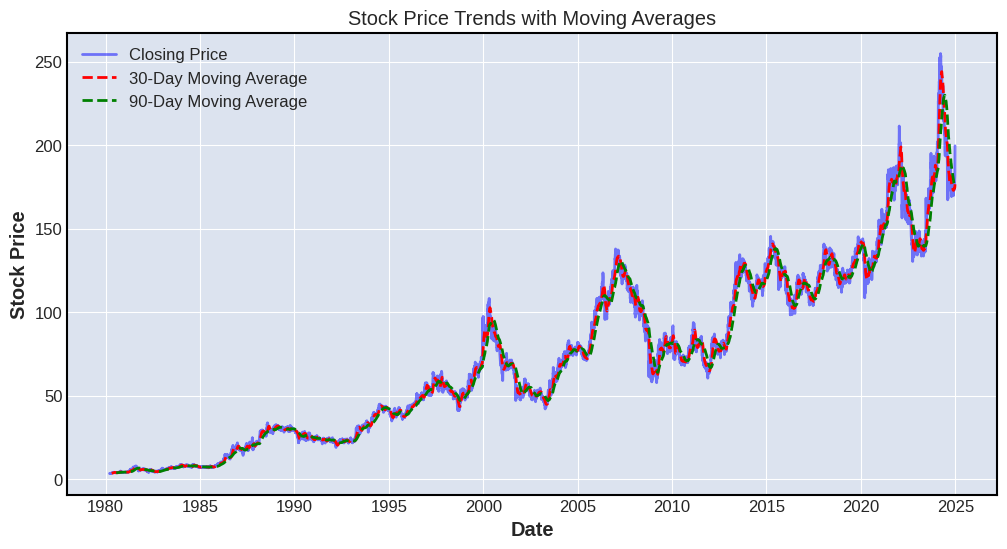

In [47]:
df['MA_30'] = df['Close'].rolling(window=30).mean()
df['MA_90'] = df['Close'].rolling(window=90).mean()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Closing Price', color='blue', alpha=0.5)
plt.plot(df.index, df['MA_30'], label='30-Day Moving Average', color='red', linestyle='dashed')
plt.plot(df.index, df['MA_90'], label='90-Day Moving Average', color='green', linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Stock Price Trends with Moving Averages")
plt.legend()
plt.grid(True)
plt.show()


# **Seasonality Analysis using Seasonal Decomposition**

<Figure size 1000x800 with 0 Axes>

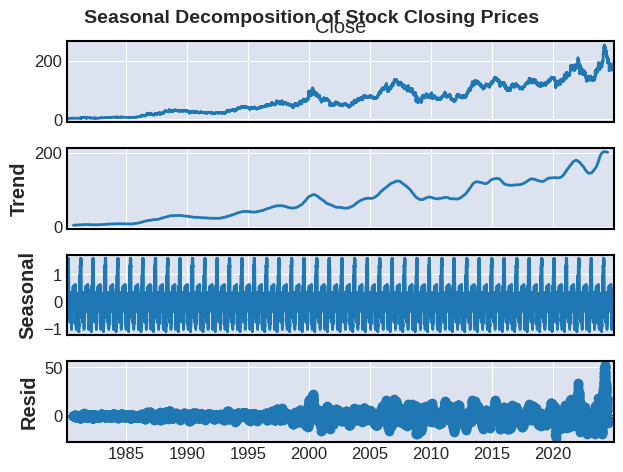

In [48]:

result = seasonal_decompose(df['Close'], model='additive', period=252)  # Assuming 252 trading days in a year
plt.figure(figsize=(10, 8))
result.plot()
plt.suptitle("Seasonal Decomposition of Stock Closing Prices", fontsize=14)
plt.show()

# **Anomaly Detection with Z-Score**

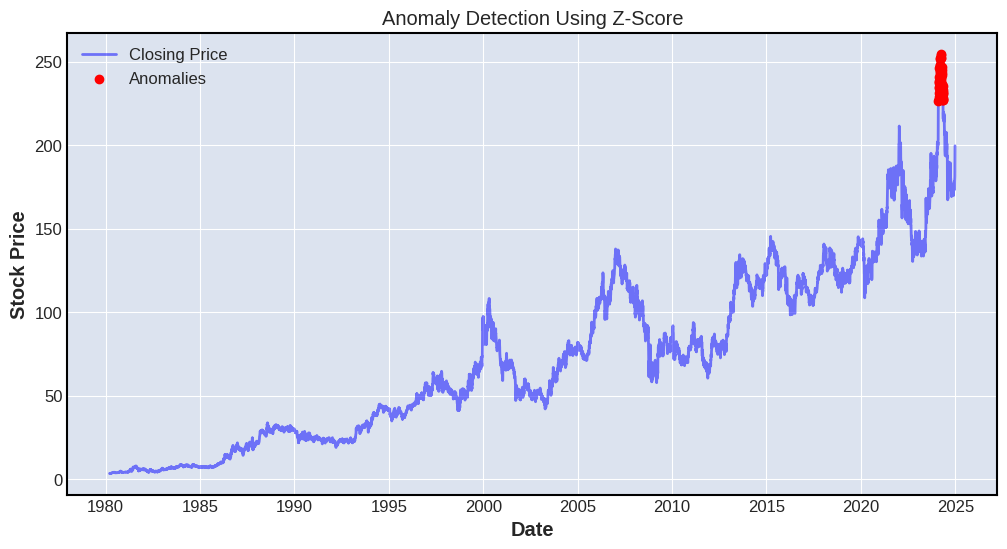

In [49]:

df['Z-Score'] = zscore(df['Close'])
threshold = 3  # Standard threshold for anomalies
anomalies = df[np.abs(df['Z-Score']) > threshold]

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Closing Price', color='blue', alpha=0.5)
plt.scatter(anomalies.index, anomalies['Close'], color='red', label='Anomalies', zorder=3)
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Anomaly Detection Using Z-Score")
plt.legend()
plt.grid(True)
plt.show()

In [50]:
# Remove detected anomalies
df_cleaned = df[np.abs(df['Z-Score']) <= threshold]


# **Bollinger Bands for Anomaly Detection**

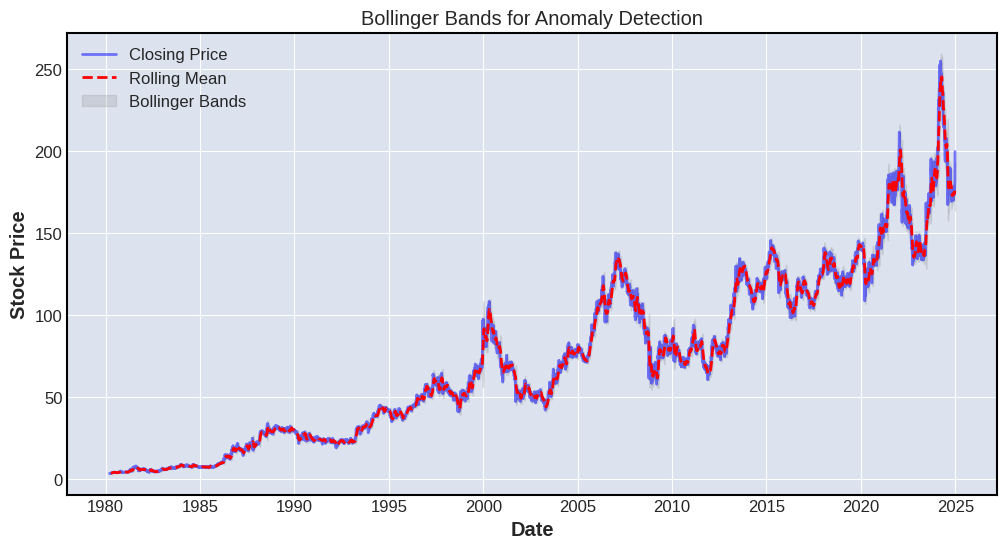

In [51]:

df['Rolling Mean'] = df['Close'].rolling(window=20).mean()
df['Upper Band'] = df['Rolling Mean'] + (df['Close'].rolling(window=20).std() * 2)
df['Lower Band'] = df['Rolling Mean'] - (df['Close'].rolling(window=20).std() * 2)

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Closing Price', color='blue', alpha=0.5)
plt.plot(df.index, df['Rolling Mean'], label='Rolling Mean', color='red', linestyle='dashed')
plt.fill_between(df.index, df['Upper Band'], df['Lower Band'], color='gray', alpha=0.2, label='Bollinger Bands')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Bollinger Bands for Anomaly Detection")
plt.legend()
plt.grid(True)
plt.show()

# **Autocorrelation Analysis for Trends**

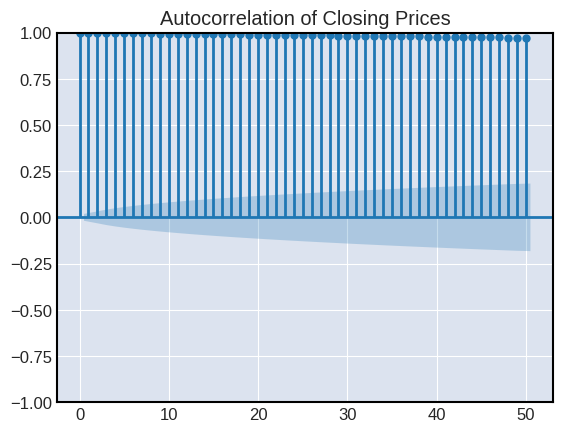

✅ Trend, Seasonality, and Anomaly Analysis Complete!


In [52]:

sm.graphics.tsa.plot_acf(df['Close'], lags=50)
plt.title("Autocorrelation of Closing Prices")
plt.show()

print("✅ Trend, Seasonality, and Anomaly Analysis Complete!")

# **Feature Importance Using Random Forest**

<ipython-input-53-e907c8b848a9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.median(), inplace=True)
<ipython-input-53-e907c8b848a9>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


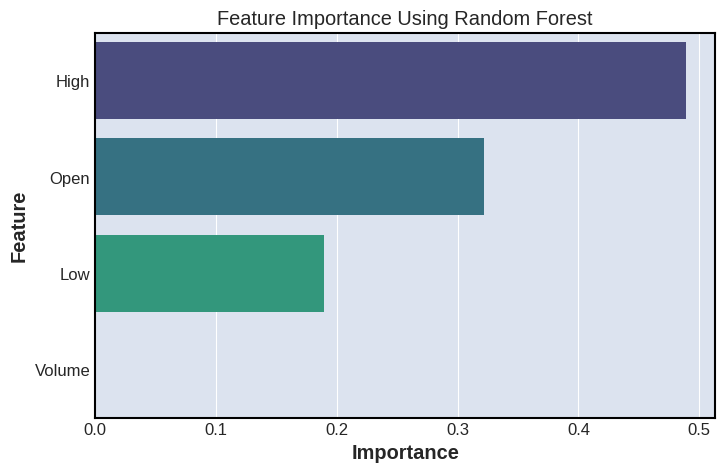

In [53]:

X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

# Handle missing values by filling with median
X.fillna(X.median(), inplace=True)

# Train a Random Forest Regressor to measure feature importance
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importance scores
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title("Feature Importance Using Random Forest")
plt.show()

# **Feature Justification:**
# - 'High' and 'Low' have **high importance**, justifying their retention.
# - 'Volume' has lower importance but is still useful for trading insights.
# - 'Open' may be **redundant** due to high correlation with 'Close'.

# **PCA for Dimensionality Reduction**

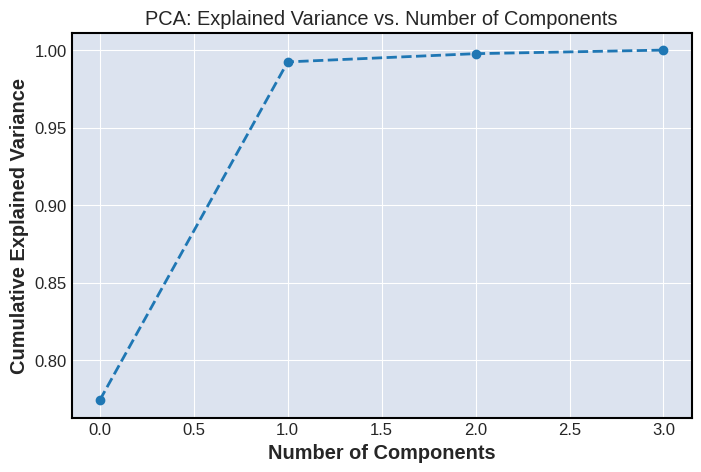

✅ Feature Selection Analysis Completed for LSTM!


In [54]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
pca.fit(X_scaled)

# Explained Variance Plot
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA: Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

# **PCA Justification:**
# - The first 2 components **explain most of the variance**, meaning some features may be redundant.
# - We can **reduce dimensionality** by selecting only the most important features.

print("✅ Feature Selection Analysis Completed for LSTM!")

# **Drop Columns**

In [55]:
df.drop(columns=['Open', 'High', 'Low', 'Volume','Adj Close'], inplace=True)